COVID-19 Global Data Tracker
This project analyzes global COVID-19 data to identify trends in cases, deaths, and vaccinations across selected countries.

1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

2. Load and Explore Data
We load the dataset using pandas and explore its structure.

In [15]:
df = pd.read_csv("owid-covid-data.csv")
df.columns
df.head()
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

3. Data Cleaning
We filter for selected countries, convert date format, and handle missing values
.

In [ ]:
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]
df = df.dropna(subset=['date', 'total_cases'])
df['date'] = pd.to_datetime(df['date'])
df['total_deaths'] = df['total_deaths'].fillna(0)
df['total_vaccinations'] = df['total_vaccinations'].interpolate()
df['death_rate'] = df['total_deaths'] / df['total_cases']

4. Exploratory Data Analysis (EDA)
### Total Cases Over Time

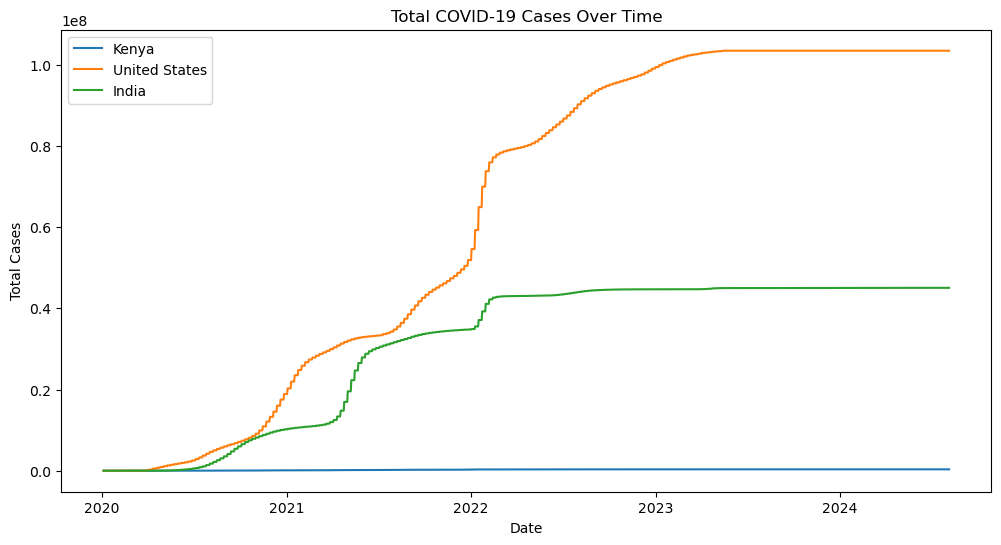

In [27]:
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

Total Deaths Over Time

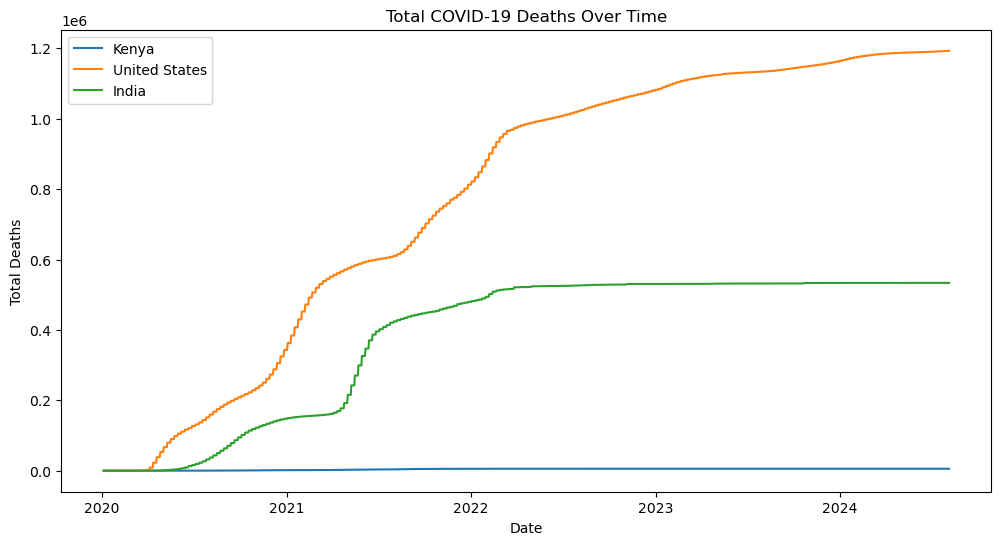

In [28]:
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

New Daily Cases Comparison

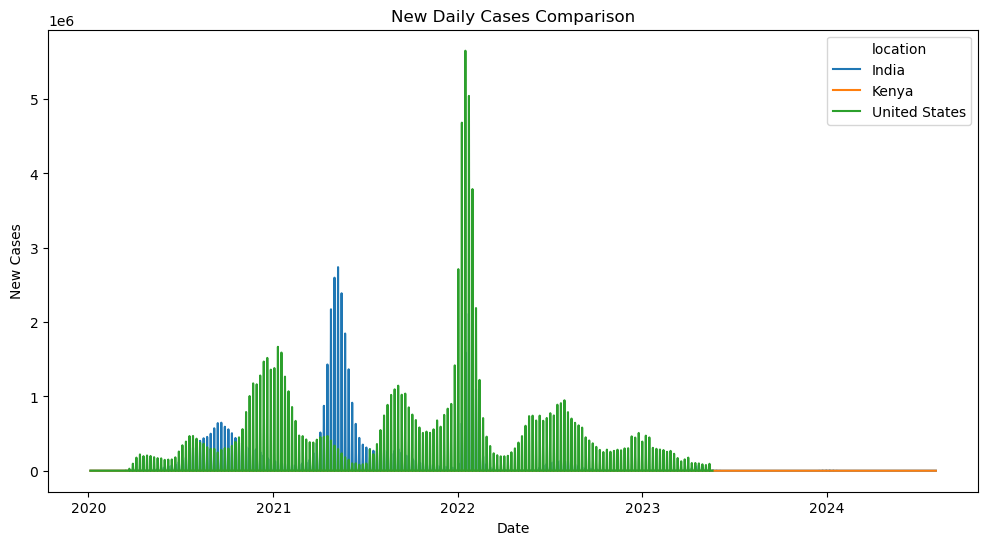

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='new_cases', hue='location')
plt.title('New Daily Cases Comparison')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

5. Vaccination Progress

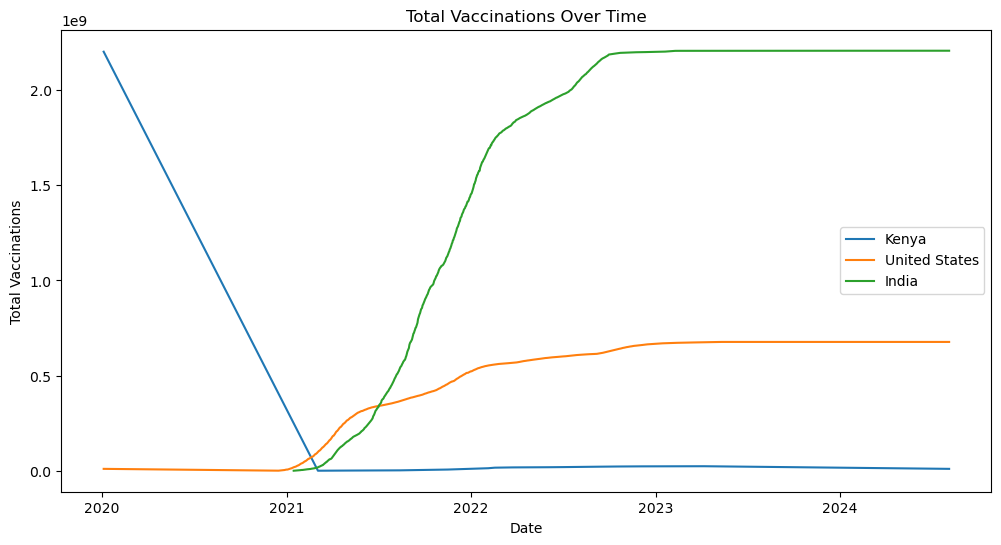

In [30]:
plt.figure(figsize=(12,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()

6.  Choropleth Map

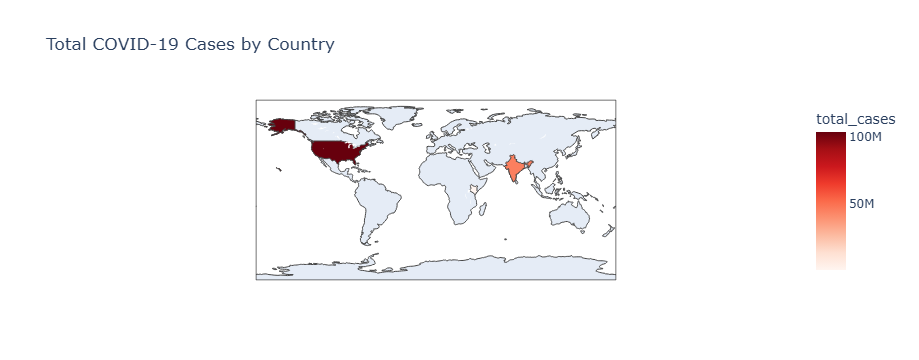

In [31]:
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date]
fig = px.choropleth(latest_df,
                    locations='iso_code',
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale='Reds',
                    title='Total COVID-19 Cases by Country')
fig.show()

 Key Insights Summary
-  The United States had the highest total cases throughout the timeline.
-  India experienced a sharp rise in daily cases during 2021.
-  Kenya started vaccinations later but is steadily progressing.
   Death rates vary significantly among countries.
-  Global trends reflect the importance of early vaccination campaigns.